#importing library to read the csv file

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud
import scipy.stats
import seaborn as sns

In [3]:
df = pd.read_csv('Datafiniti_Hotel_Reviews.csv')

In [4]:
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

In [6]:
df.shape

(10000, 25)

In [7]:
df.describe()

,latitude,longitude,reviews.rating
count,10000.000000,10000.000000,10000.000000
mean,37.003630,-92.675934,4.034265
std,5.517273,19.347989,1.162240
min,19.438604,-159.474930,1.000000
25%,33.927588,-111.622343,3.350000
50%,37.785060,-84.452114,4.000000
75%,40.416380,-77.052700,5.000000
max,70.133620,-68.203990,5.000000


In [8]:
df.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
address                    0
categories                 0
primaryCategories          0
city                       0
country                    0
keys                       0
latitude                   0
longitude                  0
name                       0
postalCode                 0
province                   0
reviews.date               0
reviews.dateSeen           0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               1
reviews.title              1
reviews.userCity        5836
reviews.userProvince    7295
reviews.username           0
sourceURLs                 0
websites                   0
dtype: int64

#Identifying the null values

#finding 'category' and 'primaryCategory' column unique values count

In [9]:
df = df.drop(["reviews.userCity", 'reviews.userProvince'], axis = 1)


In [10]:
df = df.dropna()
df.isnull().sum()

id                    0
dateAdded             0
dateUpdated           0
address               0
categories            0
primaryCategories     0
city                  0
country               0
keys                  0
latitude              0
longitude             0
name                  0
postalCode            0
province              0
reviews.date          0
reviews.dateSeen      0
reviews.rating        0
reviews.sourceURLs    0
reviews.text          0
reviews.title         0
reviews.username      0
sourceURLs            0
websites              0
dtype: int64

In [11]:
df.shape

(9998, 23)

In [12]:
df = df.rename(columns={"reviews.rating": "rating","reviews.text": "text",'reviews.title':'title' })

#plotting and graphing libraries

In [13]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'rating', 'reviews.sourceURLs', 'text', 'title', 'reviews.username',
       'sourceURLs', 'websites'],
      dtype='object')

In [14]:
df.name.value_counts()

Metro Points Hotel-Washington North                      202
The Westin Las Vegas Hotel & Spa                         170
Best Western Springfield                                 160
ARIA Resort Casino                                       139
Kinzie Hotel                                             138
                                                        ... 
National Trail Motel                                       1
Royal Palm Motel                                           1
Hampton Inn Suites Lavonia                                 1
Econolodge                                                 1
Americas Best Value Inn - Corpus Christi/Port Aransas      1
Name: name, Length: 1670, dtype: int64

In [15]:
df.name.describe()

count                                    9998
unique                                   1670
top       Metro Points Hotel-Washington North
freq                                      202
Name: name, dtype: object

In [16]:
df.country.value_counts()

US    9998
Name: country, dtype: int64

## So far examining all the columns and the first few rows, we notice many special characters, notation, commas, etc. We are mainly interested in the name, review information, rating, and even the title can give us information that we are looking for.

In [17]:
df['rating'] = df.rating.round(decimals=0)

In [18]:
df['rating'].value_counts()

5.0    4702
4.0    2777
3.0    1324
2.0     615
1.0     580
Name: rating, dtype: int64

In [19]:
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,province,reviews.date,reviews.dateSeen,rating,reviews.sourceURLs,text,title,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,CA,2013-11-14T00:00:00Z,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,CA,2014-07-06T00:00:00Z,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,CA,2015-01-02T00:00:00Z,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,MD,2016-05-15T00:00:00Z,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,MD,2016-07-09T00:00:00Z,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


#rounded numbers to appropriate whole number

## Examining and Cleaning the DataFrame

Examining the first few columns of the dataframe you can notice a few things

Special characters and notation weren't read properly. We need to fix this somehow.
There is a time column that if we would want to use needs to be altered. In this case we don't need it, so we will drop it. The same can be said for everything except review text, rating, and name.

Some text reviews are not in english. Let's figure out a way to remove them.

In [20]:
df = df.drop(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
              'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
              'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
              'reviews.sourceURLs',
              'reviews.username',
              'sourceURLs', 'websites'], axis = 1)

#droping review text and review title column to remove redundancy 

In [21]:
df = df.rename(columns={"reviews.rating": "rating","reviews.text": "text",'reviews.title':'title' })

In [22]:
df.head()

,name,rating,text,title
0,Rancho Valencia Resort Spa,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!
1,Rancho Valencia Resort Spa,5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity
2,Rancho Valencia Resort Spa,5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience
3,Aloft Arundel Mills,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep."
4,Aloft Arundel Mills,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...


## Text Preprocessing


In [23]:
# Contraction Map to be used to expand contractions 
CONTRACTION_MAP = {
"ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", 
"could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
"don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",
"he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", 
"I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would", 
"i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not",
"it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", 
"let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not",
"mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
"needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", 
"oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
"she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
"she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
"so's": "so as", "that'd": "that would", "that'd've": "that would have", "that's": "that is","there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have",
"they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
"we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
"what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
"where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
"won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
"y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
"y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
"you'll've": "you will have", "you're": "you are", "you've": "you have"
}


def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    """Expand contractions in given column of a dataframe if found in the CONTRACTION_MAP"""
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, str(text))
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

## Remove Special Characters


In [24]:
def remove_special_characters(text, remove_digits=False):
    """Removes special characters. If you set remove_digits to true it will also remove digits"""
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

## Stemming and Lemmatization


In [25]:
 import spacy
 
 from spacy import displacy

In [26]:
nlp = spacy.load("en_core_web_sm")

def simple_stemmer(text):
    """Apply the PorterStemmer() onto the given text to extract only the base of the word"""
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text


def lemmatize_text(text):
    """Use spacy to lemmatize the text"""
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


## Removing Stopwords

In [27]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def remove_stopwords(text, is_lower_case=False):
    """Remove stopwords from text"""
    # Tokenize text to separate words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # If is_lower_case is false, apply stopwords filter, otherwise lower the case for everything first
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [28]:
def normalize_corpus(corpus, contraction_expansion=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    """Normalize each document in the corpus. Functions can be excluded by changing the parameter to False"""
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # Stem text
        else:
            doc = simple_stemmer(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

# Clean "text" column using stemming
df['clean_text_stem'] = normalize_corpus(df['text'], text_lemmatization=False)

# Clean "text" column using lemmatization
df['clean_text_lem'] = normalize_corpus(df['text'])

In [29]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))

In [30]:
df.head()


,name,rating,text,title,clean_text_stem,clean_text_lem,word_count
0,Rancho Valencia Resort Spa,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,experi rancho valencia wa absolut perfect begi...,experience rancho valencia absolutely perfect ...,29
1,Rancho Valencia Resort Spa,5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,amaz place everyon wa extrem warm welcoming st...,amazing place everyone extremely warm welcomin...,52
2,Rancho Valencia Resort Spa,5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,book night stay rancho valencia play tennis si...,book night stay rancho valencia play tennis si...,81
3,Aloft Arundel Mills,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",current bed write thi past hr dog bark squeal ...,currently bed write past hr dog bark squeal ca...,37
4,Aloft Arundel Mills,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,live md aloft home away home w stay night staf...,live md aloft home away home stay night staff ...,58


In [31]:
df.clean_text_stem.head()

0    experi rancho valencia wa absolut perfect begi...
1    amaz place everyon wa extrem warm welcoming st...
2    book night stay rancho valencia play tennis si...
3    current bed write thi past hr dog bark squeal ...
4    live md aloft home away home w stay night staf...
Name: clean_text_stem, dtype: object

In [32]:
df.clean_text_lem.head()

0    experience rancho valencia absolutely perfect ...
1    amazing place everyone extremely warm welcomin...
2    book night stay rancho valencia play tennis si...
3    currently bed write past hr dog bark squeal ca...
4    live md aloft home away home stay night staff ...
Name: clean_text_lem, dtype: object

In [33]:
# Clean "title" column using stemming
df['clean_title_stem'] = normalize_corpus(df['title'], text_lemmatization=False)

# Clean "text" column using lemmatization
df['clean_title_lem'] = normalize_corpus(df['title'])

In [34]:
df['word_count_title'] = df['title'].apply(lambda x: len(str(x).split(" ")))

In [35]:
df.head()

,name,rating,text,title,clean_text_stem,clean_text_lem,word_count,clean_title_stem,clean_title_lem,word_count_title
0,Rancho Valencia Resort Spa,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,experi rancho valencia wa absolut perfect begi...,experience rancho valencia absolutely perfect ...,29,best romant vacat ever,good romantic vacation ever,4
1,Rancho Valencia Resort Spa,5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,amaz place everyon wa extrem warm welcoming st...,amazing place everyone extremely warm welcomin...,52,sweet sweet seren,sweet sweet serenity,3
2,Rancho Valencia Resort Spa,5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,book night stay rancho valencia play tennis si...,book night stay rancho valencia play tennis si...,81,amaz properti experi,amazing property experience,4
3,Aloft Arundel Mills,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",current bed write thi past hr dog bark squeal ...,currently bed write past hr dog bark squeal ca...,37,never beware want sleep,never beware want sleep,6
4,Aloft Arundel Mills,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,live md aloft home away home w stay night staf...,live md aloft home away home stay night staff ...,58,alway great stay,always great stay,3


In [36]:
df['clean_title_lem']

0       good romantic vacation ever
1              sweet sweet serenity
2       amazing property experience
3           never beware want sleep
4                 always great stay
                   ...             
9995      picture window ocean view
9996        clean comfortable quiet
9997                           pass
9998                       terrible
9999                          polde
Name: clean_title_lem, Length: 9998, dtype: object

In [37]:

df.word_count.value_counts()

61     2689
60      182
40      151
41      148
42      139
       ... 
713       1
793       1
419       1
403       1
623       1
Name: word_count, Length: 345, dtype: int64

## EDA

[Text(0.5, 1.0, 'Hotel reviews')]

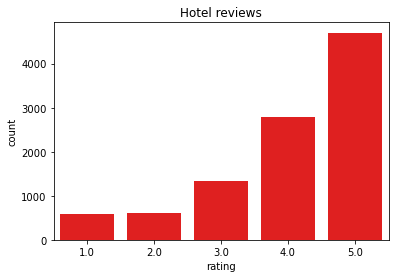

In [38]:
sns.countplot(data=df, x="rating", color = 'red').set(title= "Hotel reviews")

In [39]:
# Compute summary statistics for the numerical columns of the working DF
    
df.describe()

,rating,word_count,word_count_title
count,9998.000000,9998.000000,9998.000000
mean,4.040808,59.119724,4.316163
std,1.170191,54.386948,2.720621
min,1.000000,1.000000,1.000000
25%,3.000000,35.000000,2.000000
50%,4.000000,56.000000,4.000000
75%,5.000000,61.000000,6.000000
max,5.000000,1075.000000,24.000000


In [40]:
# Count the total number of words in the preprocessed text

sum(df.word_count)+ sum(df.word_count_title)


634232

In [41]:
# Count the total number of words and the total number of unique words in the preprocessed hotel review data

# Create an empty list 
Row_list =[] 

# Iterate over each row 
for index, rows in df.iterrows(): 
    # Create list for the current row 
    my_list =[rows.text] 

    # append the list to the final list 
    Row_list.append(my_list) 

# Combine all nested lists into a single list    
flat_list = []
for sublist in Row_list:
    for item in sublist:
        flat_list.append(item)

# Combine the list of strings into a single string        
flat_join = " ".join(flat_list)

# Convert the single large string into a single list
words_lst = flat_join.split()

print("There are ",len(words_lst),"words in the Hotel review data.")
print("There are ", len(set(words_lst)),"unique words in the hotel review data")

There are  591004 words in the Hotel review data.
There are  36576 unique words in the hotel review data


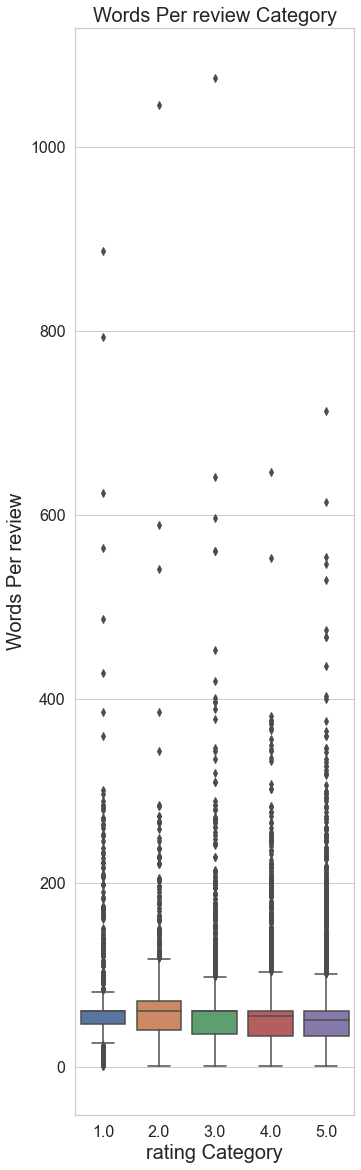

In [42]:
# Paired boxplot comparing values in the 'text' column : 'Sarcastic' vs. 'Non-sarcastic'

plt.figure(figsize=(5, 20))
sns.set(style="whitegrid")

ax = sns.boxplot(x = df['rating'],y=df["word_count"])
ax.axes.set_title("Words Per review Category",fontsize=20)
ax.set_xlabel("rating Category",fontsize=20)
ax.set_ylabel("Words Per review",fontsize=20)
ax.tick_params(labelsize=16)
plt.savefig('Review_category_boxplot.png')

In [43]:
def rating_box_plot(rating, df):
    """Create boxplots of the distribution of ratings for each category
    
    """
    sns.set()
    plt.figure(figsize=(15, 10))
    
    plt.subplot(211)
    all_beer = sns.boxplot(x=rating, data=df, color = 'goldenrod', showmeans=True,
                           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black", 
                                      "markersize":10})
    plt.title('Distribution of Rating for all hotels')
    plt.ylabel('All hotels')
    plt.xlabel('Rating')
    

def ten_plus_reviews(df, name, rating, c):
    """Create histogram for the average rating of different hotels with more than 10 reviews.
           df: dataframe 
           name: name of hotel
           rating: 1-5
           c: color of histogram
    """
    # Group name by hotel
    reviews_per_brand = df.groupby(name)
    
    # Count number of reviews per hotel
    counts = reviews_per_brand[name].count()
    
    # Calculate the mean rating for each brand of hotel
    means = reviews_per_brand[rating].mean()

    # Only plot the mean rating for hotels that have more than 10 reviews
    means[counts > 10].hist(bins=10, color = c)
    plt.axvline(means[counts > 10].mean(), color='k', linestyle='dashed', linewidth=1)
    
def log_transformation(df):
    """ Transform word_count by log to normalize it"""
    df = df.assign(log_word_count = lambda x: np.log(x.word_count))
    return dataf

def convert_ratings(df, col_name, rating):
    """Convert 5 rating scale into 3 groups
       1,2 - Low
       3 - Medium
       4,5 - High
    """
    df[col_name] = np.where(df[rating] > 3, 'high', 
             (np.where(df[rating] < 3, 'low', 'medium')))

In [44]:
# Drop any beer styles with less than 1000 reviews
id_count = df.groupby('name')['name'].transform(len)
mask = id_count > 25
df = df[mask]

In [45]:
df['name'].value_counts()

Metro Points Hotel-Washington North                  202
The Westin Las Vegas Hotel & Spa                     170
Best Western Springfield                             160
ARIA Resort Casino                                   139
Kinzie Hotel                                         138
                                                    ... 
La Quinta Inn & Suites Phoenix I-10 West              27
Four Points by Sheraton Miami Beach                   27
Grand Hyatt Kauai Resort & Spa                        27
Embassy Suites by Hilton Baltimore at BWI Airport     26
Comfort Suites Suffolk - Chesapeake                   26
Name: name, Length: 74, dtype: int64

C:\Tanuj\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


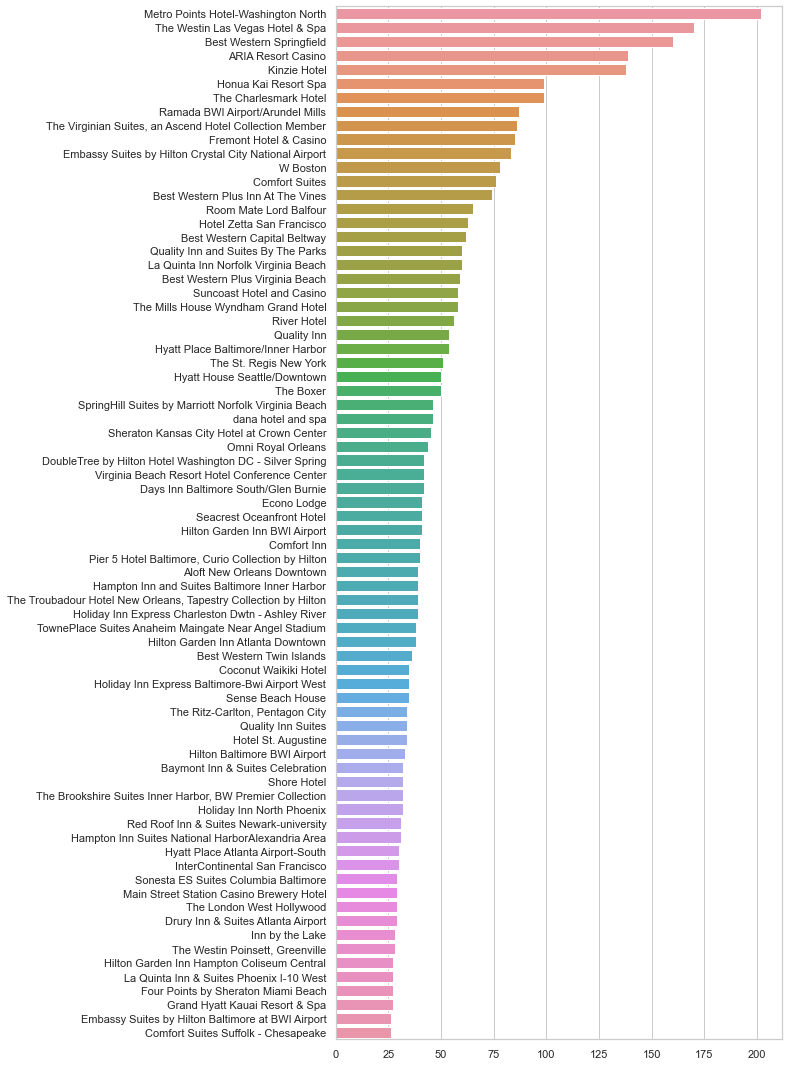

In [46]:
review_count = pd.value_counts(df['name'].values, sort=True)

plt.figure(figsize=(8,19))
sns.barplot(review_count.values, review_count.index)
plt.show()

In [47]:
df['name'].value_counts()

Metro Points Hotel-Washington North                  202
The Westin Las Vegas Hotel & Spa                     170
Best Western Springfield                             160
ARIA Resort Casino                                   139
Kinzie Hotel                                         138
                                                    ... 
La Quinta Inn & Suites Phoenix I-10 West              27
Four Points by Sheraton Miami Beach                   27
Grand Hyatt Kauai Resort & Spa                        27
Embassy Suites by Hilton Baltimore at BWI Airport     26
Comfort Suites Suffolk - Chesapeake                   26
Name: name, Length: 74, dtype: int64

In [48]:
df.rating.value_counts()

5.0    1872
4.0    1157
3.0     552
2.0     249
1.0     146
Name: rating, dtype: int64

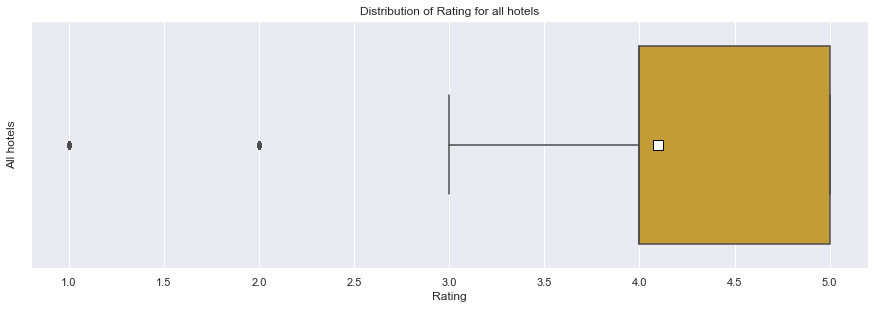

In [49]:
rating_box_plot(rating="rating", df=df)

Text(0.5, 1.0, 'All Hotels Probability Plot (Word Count Log)')

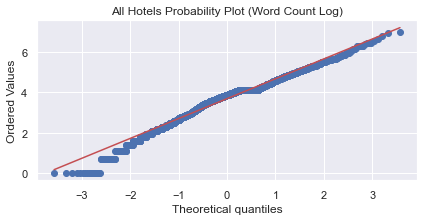

In [50]:
df = df.assign(log_word_count = lambda x: np.log(x.word_count))
plt.figure(figsize=(15,10))

plt.subplot(321)
scipy.stats.probplot(df.log_word_count, dist='norm', fit=True, plot=plt)
plt.title('All Hotels Probability Plot (Word Count Log)')

C:\Tanuj\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Tanuj\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


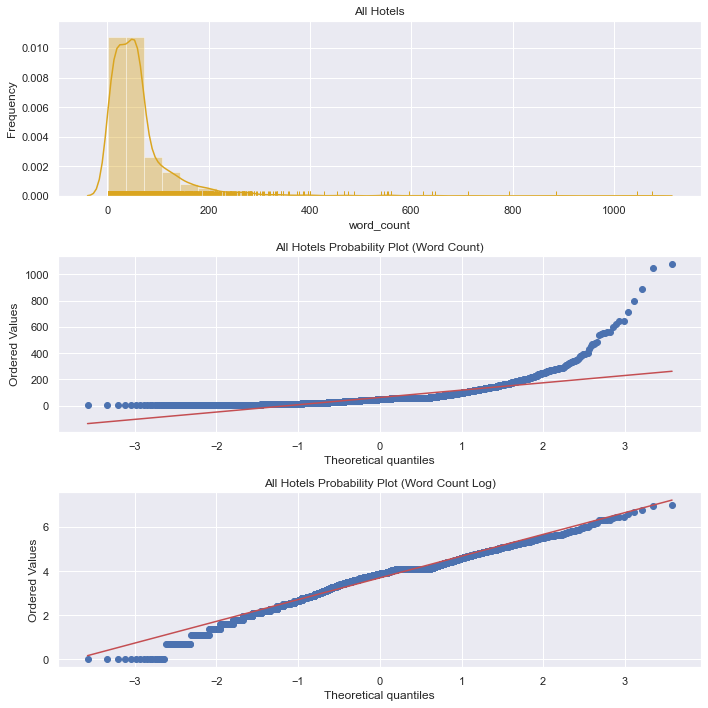

In [51]:
plt.figure(figsize=(10,10))

plt.subplot(311)
sns.distplot(df.word_count, bins=30, kde=True, rug=True, color='goldenrod')
plt.title('All Hotels')
plt.ylabel('Frequency')

plt.subplot(312)
scipy.stats.probplot(df.word_count, dist='norm', fit=True, plot=plt)
plt.title('All Hotels Probability Plot (Word Count)')

plt.subplot(313)

scipy.stats.probplot(df.log_word_count, dist='norm', fit=True, plot=plt)
plt.title('All Hotels Probability Plot (Word Count Log)')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'All Beers Probability Plot (Word Count)')

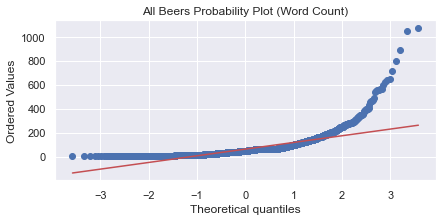

In [52]:
plt.figure(figsize=(15,10))

plt.subplot(321)
scipy.stats.probplot(df.word_count, dist='norm', fit=True, plot=plt)
plt.title('All Beers Probability Plot (Word Count)')

In [53]:
def convert_ratings(df, col_name, rating):
    """ Convert the 5 star rating for a specific column in a dataframe into three groups.
        low - 1,2
        medium - 3
        high - 4,5
    """
    df[col_name] = np.where(df[rating] > 3, 'high', 
             (np.where(df[rating] < 3, 'low', 'medium')))
    
def low_high_stats(df):
    groupby_rating = df['log_word_count'].groupby(df['high_low'])
    groupby_rating.mean()
    
    high_count = df.log_word_count[df['high_low'] == 'high']
    low_count = df.log_word_count[df['high_low'] == 'low']
    
    tstat, p_value = scipy.stats.ttest_ind(low_count, high_count, equal_var=False)
    print('Tests statistic', '{0:0.3f}'.format(tstat))
    print('P-value of test', '{0:0.3f}'.format(p_value))
    if p_value < 0.05:
        print('There IS a significant difference between',
          'word counts for low and high reviews')
    else:
        print('There IS NOT a significant difference between', 
           'word counts for low and high reviews')

def three_cat_stats(df, col):
    groupby_rating = df.log_word_count.groupby(df[col])
    groupby_rating.mean()
    
    high_count = df.log_word_count[df[col] == 'high']
    low_count = df.log_word_count[df[col] == 'low']
    med_count = df.log_word_count[df[col] == 'medium']
    
    F, p_value = scipy.stats.f_oneway(low_count, med_count, high_count)
    print('Tests statistic', '{0:0.3f}'.format(F))
    print('P-value of test', '{0:0.3f}'.format(p_value))
    if p_value < 0.05:
        print('There IS a significant difference between word counts.')
    else:
        print('There IS NOT difference between', 
           'word counts.')

In [54]:
def word_freq_plot(df, col):
    """Take a column from a dataframe and split the words within each review. Then combine them back together into one list.
       After create a frequency distribution plot to determine the frequency of the words.
    """
    words = "".join(df[col].apply(str)).split()
    freqdist = nltk.FreqDist(words)
    freqdist.plot(25)
    
def word_cloud(df, col):
    """Take a given column of reviews and create a word cloud from it."""
    
    all_words = ''
    df[col].dropna(inplace=True)
    for val in df[col]:
        tokens = word_tokenize(val)
        for words in tokens:
            all_words = all_words + ' ' + words
        
    wordcloud = WordCloud(max_words=1000, width=600, height=400).generate(all_words)
    
    plt.figure( figsize=(10,8), facecolor='black')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [55]:
reviews = [
    (df['rating'] > 3),
    (df['rating'] < 3)
]
rating = ['positive', 'negative']
df['rating'] = np.select(reviews, rating, default='average')
df.rating.value_counts()

positive    3029
average      552
negative     395
Name: rating, dtype: int64

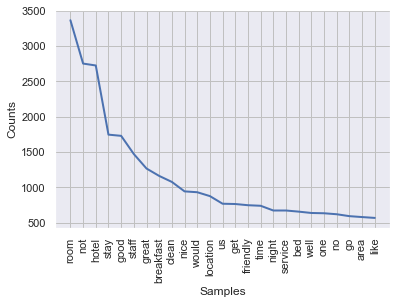

In [56]:
word_freq_plot(df, col='clean_text_lem')

In [59]:
# Combine all reviews into one string in order to count the total number of words in all rows of the preprocessed review...
#... column 'text30'
        
all_review_words = " ".join(text for text in df.text)
print ("There are {} characters in the combination of all reviews.".format(len(all_review_words)))

There are 1364090 characters in the combination of all reviews.


In [58]:
# Find the frequency of each word in a string. To be used to count the occurrence of individual words in all the...
#... preprocessed review text

def count_words(words):   
        word_freq = {}       # create an empty dictionary 
        lst = words.split()  # split the words parameter (which is a string) into individual strings and place inside a list 
        for elements in lst:
        #for elements in words:
                # check if each word has '.' at its last. If so then ignore '.' 
            if elements[-1] == '.': 
                elements = elements[0:len(elements) - 1] 
                # if there already exists a key as "elements" then simply # increase its value. 
            if elements in word_freq: 
                word_freq[elements] += 1
                # if the dictionary does not have the key as "elements" then create a key "elements" and assign its value to 1. 
            else: 
                word_freq.update({elements: 1}) 

        return word_freq # return the updated dictionary

# Reference: https://www.geeksforgeeks.org/find-frequency-of-each-word-in-a-string-in-python/

In [60]:

# Count the occurrence of each word in the preprocessed review text for all the tweet text and place inside a ...
#... new dictionary
    
word_freq = count_words(all_review_words)

# Sort the new dictionary in descending order
word_freq_ordered = {k: v for k, v in sorted(word_freq.items(), key=lambda item: item[1], reverse = True)}

# Reference: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

In [62]:
# Create a new dictionary for the top 20 most-frequently-occurring words in the preprocessed review text data
import itertools
word_freq_top20 = dict(itertools.islice(word_freq_ordered.items(),20))

# Reference: https://www.tutorialspoint.com/How-to-truncate-a-Python-dictionary-at-a-given-length

In [63]:
word_freq_top30 = dict(itertools.islice(word_freq_ordered.items(),30))
word_freq_top30

{'the': 11760,
 'and': 8556,
 'to': 6781,
 'was': 6495,
 'a': 5925,
 'The': 3521,
 'I': 3402,
 'in': 3347,
 'of': 3093,
 'for': 2980,
 'is': 2637,
 'hotel': 2331,
 'room': 2212,
 'we': 2007,
 'very': 1963,
 'at': 1854,
 'were': 1820,
 'you': 1815,
 'with': 1773,
 'it': 1686,
 'that': 1585,
 'on': 1555,
 'We': 1554,
 'not': 1550,
 'our': 1438,
 'but': 1404,
 'had': 1368,
 'stay': 1324,
 'staff': 1236,
 'have': 1197}

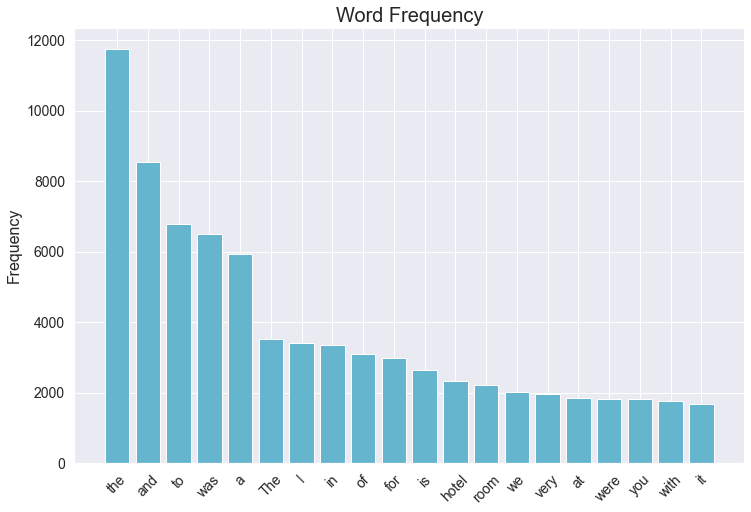

In [64]:
# Create a bar chart of the top 20 most-frequently-occurring words in the preprocessed review text data
    
labels, values = zip(*word_freq_top20.items())
plt.figure(figsize=(12,8))
words_hist = plt.bar(labels, values, color = 'c')
plt.title('Word Frequency', fontsize = 20)
plt.ylabel('Frequency', fontsize = 16)
plt.yticks(fontsize=14)
plt.xticks(rotation = 45, fontsize=16)
plt.xticks(fontsize=14)
plt.savefig('words_hist.png')

In [71]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df["review_clean"] = df["text"].apply(lambda x: clean_text(x))

In [74]:
df.head()

,name,rating,text,title,clean_text_stem,clean_text_lem,word_count,clean_title_stem,clean_title_lem,word_count_title,log_word_count,review_clean
28,Hampton Inn Suites National HarborAlexandria Area,positive,Hotel is in the perfect spot at the perfect pr...,THE DC TRIP,hotel perfect spot perfect price not perfect v...,hotel perfect spot perfect price not perfect v...,277,dc trip,dc trip,3,5.624018,hotel perfect spot perfect price perfect view ...
29,Hampton Inn Suites National HarborAlexandria Area,positive,Excellent experience. Will come again and book...,Nice location,excel experience come book stay futur,excellent experience come book stay future,11,nice locat,nice location,2,2.397895,excellent experience come book stay future
30,Hampton Inn Suites National HarborAlexandria Area,negative,"heat in room did not work properly, tv remote ...",Hampton Inn,heat room not work properly tv remot wa broken...,heat room not work properly tv remote break ex...,13,hampton inn,hampton inn,2,2.564949,heat room work properly tv remote break excess...
31,Hampton Inn Suites National HarborAlexandria Area,positive,"Even though we were having problems, i.e. Feat...",Gracious and helpful staff,even though problems e feather allergy flat ti...,even though problem e feather allergy flat tir...,22,graciou help staff,gracious helpful staff,4,3.091042,even though problem i.e feather allergy flat t...
32,Hampton Inn Suites National HarborAlexandria Area,positive,Brand new hotel in brand new retail area on th...,"beautiful, convenient location",brand new hotel brand new retail area water ea...,brand new hotel brand new retail area water ea...,109,beautiful conveni locat,beautiful convenient location,3,4.691348,brand new hotel brand new retail area water ea...


In [76]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["text"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)


In [77]:

# add number of characters column
df["nb_chars"] = df["text"].apply(lambda x: len(x))

# add number of words column
df["nb_words"] = df["text"].apply(lambda x: len(x.split(" ")))

In [81]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

In [83]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

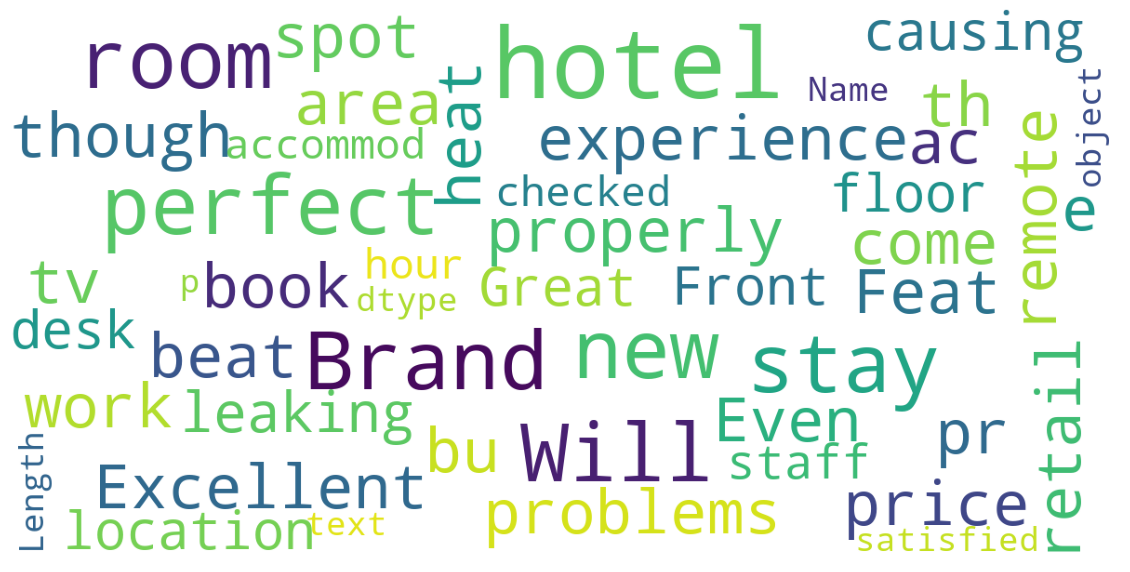

In [116]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 300,
        max_font_size = 35, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["text"])

In [88]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["text", "pos"]].head(10)


,text,pos
554,Good: Great value. Great location.,0.931
4150,"Good: Great value, excellent customer service",0.868
896,Good: Great value! Very friendly staff. Excell...,0.851
3565,"Great experience. Friendly, helpful staff.",0.835
703,Good: great location Good services,0.832
870,"Good: Great staff, superb rooms, brilliant loc...",0.832
680,"Good: Great location,comfortable beds,very clean",0.829
1028,"Good: Good location, comfortable bed",0.820
837,"Good: Perfect Location, friendly staff, amazin...",0.819
615,"Good: Nice room, friendly staff",0.817


In [90]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["text", "neg"]].head(10)


,text,neg
4156,Bad: Ac wasnt working . Good: Clean,0.731
3631,Bad: The eggs was nasty.,0.703
815,Bad: The elevators were a problem.,0.674
4199,Bad: No microwave at breakfast.,0.655
675,Bad: Room was terribly dirty. Good: Location,0.629
3618,Bad: key didn't work. Good: helpfulness of staff,0.624
803,Bad: HODO lounge service was poor.,0.623
1018,Bad: f b facilities not open. Good: everything,0.596
191,Bad: Nothing. Good: Location on Fremont,0.596
4575,Dirty rooms. Outdated decor. Faulty lights. Ba...,0.591


C:\Tanuj\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


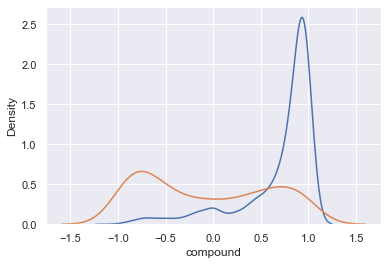

In [95]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in rating:
    subset = df[df['rating'] == x]
    
    # Draw the density plot
    if x == 'positive':
        label = "positive"
    elif x == "negative" :
        label = "negative"
    else:
        label = 'neutral'
    sns.distplot(subset['compound'], hist = False, label = label)

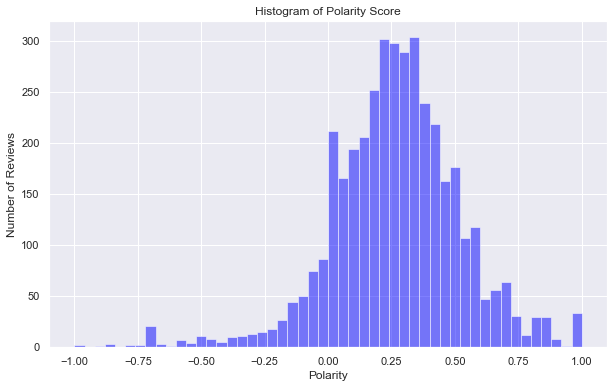

In [100]:
from textblob import TextBlob

df['text']= df['text'].astype(str) #Make sure about the correct data type
pol = lambda x: TextBlob(x).sentiment.polarity
df['polarity'] = df['text'].apply(pol) # depending on the size of your data, this step may take some time.
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

# reference: https://towardsdatascience.com/sentiment-analysis-on-amazon-reviews-45cd169447ac

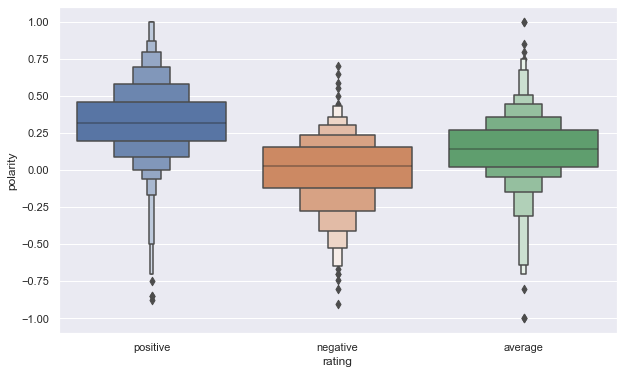

In [104]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='rating', y='polarity', data=df)
plt.show();

In [110]:
df.loc[(df.polarity == 1 & (df['rating'] == 'positive'))].text.head(10).tolist()

["I can't comment on the breakfast because we slept through it but everything else was excellent! I dont know why anyone would pay twice the price to stay at the Gaylord. 5 stars all the way!",
 'Everything was perfect',
 'The staff and amenities are excellent!!',
 'Noise Excellent location',
 "This hotel has bedbugs!! The staff acted like it wasn't a big idea!! Don't stay here!!",
 'Loved the steam shower! Luxurious!',
 'Best vacation ever!!!',
 'I was charged twice for my room and when I checkout thereally is another charge to my account which they could not figure out.',
 'Room smelled waited 45mins for shuttle',
 'Service was excellent']

In [112]:
sub = lambda x: TextBlob(x).sentiment.subjectivity
df['subjectivity'] = df['text'].apply(sub)
df.sample(10)

,name,rating,text,title,clean_text_stem,clean_text_lem,word_count,clean_title_stem,clean_title_lem,word_count_title,...,word_yell,word_yes,word_yet,word_yogurt,word_york,word_you,word_young,word_zero,polarity,subjectivity
5335,Ramada BWI Airport/Arundel Mills,positive,Everything was Excellent!!! Quality Service! W...,One in Million!!!,everyth wa excellent qualiti service come back,everything excellent quality service come back,9,one million,one million,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000
8423,Comfort Inn,positive,We stayed one night here while passing through...,Pleasantly Surprised,stay one night pass town room wa comfy hot bre...,stay one night pass town room comfy hot breakf...,61,pleasantli surpris,pleasantly surprised,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.320536,0.572619
46,Hampton Inn Suites National HarborAlexandria Area,positive,"Awesome, Overall",Will definately stay there again,awesome overal,awesome overall,2,defin stay,definately stay,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000
5602,Metro Points Hotel-Washington North,positive,Excelente hotel buena atencion y la ubicacion ...,Estadia en Washington,excelent hotel buena atencion la ubicacion bue...,excelente hotel buena atencion la ubicacion bu...,29,estadia en washington,estadia en washington,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3088,Holiday Inn Express Baltimore-Bwi Airport West,positive,"Hotel clean, convenient, breakfast good, staff...",Nice hotel close to mall/casino,hotel clean convenient breakfast good staff fr...,hotel clean convenient breakfast good staff fr...,12,nice hotel close mallcasino,nice hotel close mall casino,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.480556,0.600000
1060,Hotel Zetta San Francisco,average,Bad: Noisy.,Noisy,bad noisy,bad noisy,2,noisi,noisy,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.700000,0.666667
5594,Metro Points Hotel-Washington North,positive,My extended weekend stay at this hotel was ver...,"A good deal, not to be passed up.",extend weekend stay thi hotel wa veri enjoyabl...,extended weekend stay hotel enjoyable no compl...,57,good deal not pass,good deal not pass,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.361111,0.504444
593,The Westin Las Vegas Hotel & Spa,positive,Bad: No hot water in the morning. Good: This w...,Good overall. Just fix your boiler.,bad no hot water morning good thi wa great hot...,bad no hot water morning good great hotel stri...,45,good overall fix boiler,good overall fix boiler,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178125,0.752083
889,Kinzie Hotel,negative,The reception desk guy at checkin was reckless...,Not a four star.,recept desk guy checkin wa reckless breakfast ...,reception desk guy checkin reckless breakfast ...,105,not four star,not four star,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.094697,0.453788
2347,Omni Royal Orleans,positive,Stayed 3 nights for a conference. The rooms ar...,"Service, location fabulous",stay night conference room small thi histor pr...,stay night conference room small historic prop...,57,service locat fabul,service location fabulous,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.332963,0.694444


C:\Tanuj\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

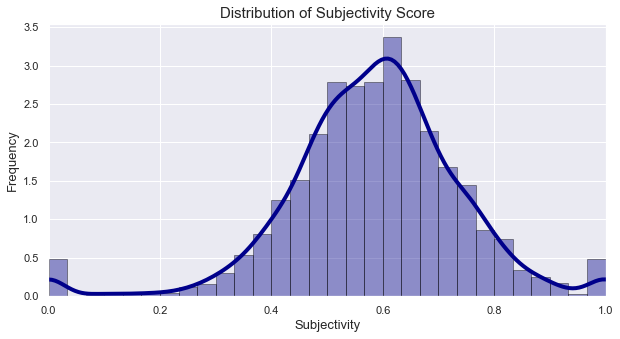

In [113]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True,
bins=int(30), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

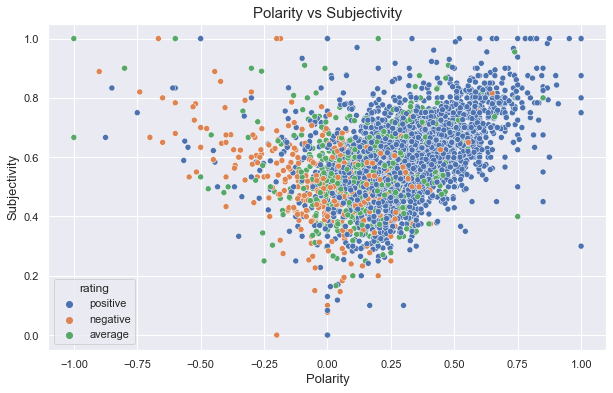

In [115]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity', y='subjectivity', hue="rating", data=df)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show();

## Machine Learning

In [123]:
df.head()

,name,rating,text,title,clean_text_stem,clean_text_lem,word_count,clean_title_stem,clean_title_lem,word_count_title,...,word_yell,word_yes,word_yet,word_yogurt,word_york,word_you,word_young,word_zero,polarity,subjectivity
28,Hampton Inn Suites National HarborAlexandria Area,positive,Hotel is in the perfect spot at the perfect pr...,THE DC TRIP,hotel perfect spot perfect price not perfect v...,hotel perfect spot perfect price not perfect v...,277,dc trip,dc trip,3,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.250893,0.458185
29,Hampton Inn Suites National HarborAlexandria Area,positive,Excellent experience. Will come again and book...,Nice location,excel experience come book stay futur,excellent experience come book stay future,11,nice locat,nice location,2,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.500000,0.562500
30,Hampton Inn Suites National HarborAlexandria Area,negative,"heat in room did not work properly, tv remote ...",Hampton Inn,heat room not work properly tv remot wa broken...,heat room not work properly tv remote break ex...,13,hampton inn,hampton inn,2,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-0.250000,0.533333
31,Hampton Inn Suites National HarborAlexandria Area,positive,"Even though we were having problems, i.e. Feat...",Gracious and helpful staff,even though problems e feather allergy flat ti...,even though problem e feather allergy flat tir...,22,graciou help staff,gracious helpful staff,4,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-0.012500,0.562500
32,Hampton Inn Suites National HarborAlexandria Area,positive,Brand new hotel in brand new retail area on th...,"beautiful, convenient location",brand new hotel brand new retail area water ea...,brand new hotel brand new retail area water ea...,109,beautiful conveni locat,beautiful convenient location,3,...,0.0,0.0,0.0,0.0,0.0,0.178919,0.0,0.0,0.112746,0.637174


In [117]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import numpy as np
import scipy as sp
import pickle

# Build figures inline
%matplotlib inline
# Import scikit-learn tools, vectorizers, transformer, and classifiers
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score


# import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# import Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# import Logistic Regression CV Classifier
from sklearn.linear_model import LogisticRegressionCV

# import SVM classifiers
from sklearn.svm import SVC

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [137]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST

X = df["clean_text_lem"]
y = df["rating"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
# Instantiate CountVectorizer and TfidfVectorizer
vect = CountVectorizer(min_df=1, ngram_range=(1, 2)) 
tfidf_vect = TfidfVectorizer(min_df=1, ngram_range=(1, 2))

In [138]:
tfidf = TfidfVectorizer(min_df=1, ngram_range=(1, 2))

In [139]:
# Apply CountVectorizer 
X_all_C = vect.fit_transform(df.clean_text_lem.apply(str))
X_all_C = X_all_C.tocsc() 

# Apply TfidfVectorizer
X_all_idf = tfidf_vect.fit_transform(df.clean_text_lem.apply(str))
X_all_idf = X_all_idf.tocsc() 

In [140]:
# Split train/test data for all data
# This is for CountVectorizer
Xtrain_all_C, Xtest_all_C, ytrain_all_C, ytest_all_C = train_test_split(X_all_C, y, random_state=17)

# This is for Tfidf Vectorizer
Xtrain_all_idf, Xtest_all_idf, ytrain_all_idf, ytest_all_idf = train_test_split(X_all_idf, y, random_state=17)

In [141]:
# Instantiate MultinomialNB() for CountVectorizer
nb_overall = MultinomialNB(alpha=1, fit_prior=True )

# Train model
nb_overall.fit(Xtrain_all_C, ytrain_all_C)

# Make predictions for Xtest
y_pred_count = nb_overall.predict(Xtest_all_C)

# Calculate F1 Score
f1 = metrics.f1_score(ytest_all_C, y_pred_count)

# Confusion matrix
cm = metrics.confusion_matrix(ytest_all_C, y_pred_count)

# Calculate predicted probabilities for Xtest
y_prob_count = nb_overall.predict_proba(Xtest_all_C)[:,1]

# Calculate AUC for Naive Bayes model with CountVec
auc = metrics.roc_auc_score(ytest_all_C, y_prob_count)

print(vect)
print('\nF1 Score: ', f1)
print('\nConfusion Matrix:\n', cm)
print('\nAUC: ', auc)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].